# Data introduction

Data that I have chosen for this assignment talks about Polycystic Ovary Syndrome (later reffered as PCOS). PCOS is a common hormonal problem for people with ovaries. People that suffer from this condition may not ovulate, have high levels of androgens (male hormones), and have many small cysts on the ovaries. PCOS can cause missed or irregular menstrual periods, excess hair growth, acne, infertility, and weight gain.


Data comes from: https://www.kaggle.com/datasets/prasadbobby/pcosdata?resource=download

# Necessary libraries

In [1]:
pip install mixed-naive-bayes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

In [5]:
pcos = pd.read_csv("pcos.csv", sep=",", index_col=[0])
pcos

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,10001,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
2,10002,0,36,65.0,161.500,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
3,10003,1,33,68.8,165.000,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
4,10004,0,37,65.0,148.000,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
5,10005,0,25,52.0,161.000,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,10537,0,35,50.0,164.592,18.500000,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
538,10538,0,30,63.2,158.000,25.300000,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
539,10539,0,36,54.0,152.000,23.400000,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN


In [6]:
list(pcos.columns)

['Patient File No.',
 'PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)',
 'Unnamed: 42']

# Column Explanation

Firstly, I would like to explain columns' names which, in my opinion, will help understanding the data thoroughly. I won't be explaining the ones that are obvious. I'll tackle mostly medical names.

In 'Pulse rate' bpm stands for beats per minute.

In 'RR (breaths/min)', RR stand for respiratory rate measured in breath per minute.

'Hb(g/dl)' features hemoglobin level measured in grams in deciliter.

'Cycle(R/I)' means wether menstrual cycle is regualar(R) or irregular(I).

'FSH(mIU/mL)' explains the Follicle Stimulating Hormone level in milli-International Units per milliliter. It is an important hormone for normal functioning of the reproductive system in men and women. In people with ovaries, FSH helps control the menstrual cycle and the production of eggs by the ovaries.

'LH(mIU/mL)' is Lutropin(Luteinizing hormone). Low LH levels may be a sign of delayed puberty.

'TSH (mIU/L)' is Thyrotropin (Thyroid-stimulating hormone). This is a hormone that controls the way other hormones function.

'AMH(ng/mL)' is an anti-mullerian hormone. It is a hormone that prevents male fetus from developing female sex organs. It is measured in nanograms in mililiter.

'PRL(ng/mL)' is Prolactin. This is a hormone that's responsible for lactation, certain breast tissue development and contributes to hundreds of other bodily processes.

'PRG(ng/mL)' is Progesterone. The main function of progesterone is to prepare the endometrium (lining of your uterus) for a fertilized egg to implant and grow.

'RBS(mg/dl)' means Random glucose test.

'BP _Systolic (mmHg)' and 'BP _Diastolic (mmHg)' are systolic and diastolic blood preassures. Systolic measures the pressure in your arteries when your heart beats and diastolic measures the pressure in your arteries when your heart rests between beats.

'Follicle No. (L)' and 'Follicle No. (R)' are numbers of follicles in the left and right ovaries detected during an ultrasound examination.

'Avg. F size (L) (mm)' and 'Avg. F size (R) (mm)' are the average sizes of follicles in the left and right ovary in millimeters.

'Endometrium (mm)' is he thickness of the endometrial lining of the uterus in millimeters.

# Data preprocessing

First step is to check for missing values.

In [7]:
pcos.isnull().sum()

Patient File No.           0
PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y/N)          0
BP _Systolic (

I am pleased with the results. Column 'Unnamed: 42' is an error that I will be getting rid of. Marriage status and fast food, which both have only one missing value, are also columns that I will be ignoring along with 'Patient File No.', 'Waist:Hip Ratio'.

In [8]:
pcos = pcos.drop(columns=['Patient File No.', 'Marraige Status (Yrs)', 'Waist:Hip Ratio', 'Fast food (Y/N)', 'Blood Group', 'Unnamed: 42'])

For every Yes/No questions, Yes = 1, No = 0.

In "Cycle", regular is typed as 2 and irregular as 4, I want to change it to 0 and 1.

In [9]:
pcos["Cycle(R/I)"] = np.where(pcos["Cycle(R/I)"] == 2, 0, 1)

Let's see the types of each column in order to find out if I have to change any.

In [10]:
pcos.dtypes

PCOS (Y/N)                int64
 Age (yrs)                int64
Weight (Kg)             float64
Height(Cm)              float64
BMI                     float64
Pulse rate(bpm)           int64
RR (breaths/min)          int64
Hb(g/dl)                float64
Cycle(R/I)                int32
Cycle length(days)        int64
Pregnant(Y/N)             int64
No. of aborptions         int64
FSH(mIU/mL)             float64
LH(mIU/mL)              float64
FSH/LH                  float64
Hip(inch)                 int64
Waist(inch)               int64
TSH (mIU/L)             float64
AMH(ng/mL)               object
PRL(ng/mL)              float64
Vit D3 (ng/mL)          float64
PRG(ng/mL)              float64
RBS(mg/dl)              float64
Weight gain(Y/N)          int64
hair growth(Y/N)          int64
Skin darkening (Y/N)      int64
Hair loss(Y/N)            int64
Pimples(Y/N)              int64
Reg.Exercise(Y/N)         int64
BP _Systolic (mmHg)       int64
BP _Diastolic (mmHg)      int64
Follicle

Clearly, Yes/No questions should not be integers but factors.

In [11]:
for col in ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Reg.Exercise(Y/N)", "Cycle(R/I)"]:
    pcos[col] = pcos[col].astype('category')

In [12]:
pcos.dtypes

PCOS (Y/N)              category
 Age (yrs)                 int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)              category
Cycle length(days)         int64
Pregnant(Y/N)           category
No. of aborptions          int64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gain(Y/N)        category
hair growth(Y/N)        category
Skin darkening (Y/N)    category
Hair loss(Y/N)          category
Pimples(Y/N)            category
Reg.Exercise(Y/N)       category
BP _Systolic (mmHg)        int64
BP _Diasto

One column is object type due to value "a" at position 305. Because I can't guess what value should be there. I will delete the whole row.

In [13]:
pcos = pcos.drop([pcos.index[305]])
pcos['AMH(ng/mL)'] = pcos['AMH(ng/mL)'].astype('float')

In [14]:
pcos.dtypes

PCOS (Y/N)              category
 Age (yrs)                 int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)              category
Cycle length(days)         int64
Pregnant(Y/N)           category
No. of aborptions          int64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
TSH (mIU/L)              float64
AMH(ng/mL)               float64
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gain(Y/N)        category
hair growth(Y/N)        category
Skin darkening (Y/N)    category
Hair loss(Y/N)          category
Pimples(Y/N)            category
Reg.Exercise(Y/N)       category
BP _Systolic (mmHg)        int64
BP _Diasto

# Data normalization

I want to normalize the data to check wether it is significant in classification. Obviously I only normalize numerical columns. Categorical ones will be merged to normalized dataframe. Also, I decided to move PCOS column to the beginning.

In [15]:
cols = pcos.select_dtypes(np.number).columns
cols_cat = pcos.select_dtypes('category').columns
pcos[cols] = minmax_scale(pcos[cols])
pcos_cont = pcos[cols]
pcos_cat = pcos[cols_cat]
pcos_norm = pd.concat([pcos_cont, pcos_cat], axis=1)

temp_cols=pcos_norm.columns.tolist()
index=pcos_norm.columns.get_loc("PCOS (Y/N)")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
pcos_norm=pcos_norm[new_cols]

pcos_norm

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,...,Avg. F size (R) (mm),Endometrium (mm),Cycle(R/I),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,0,0.285714,0.176623,0.348837,0.259878,0.942029,0.500000,0.314286,0.416667,0.0,...,0.750000,0.472222,0,0,0,0,0,0,0,0
2,0,0.571429,0.441558,0.569767,0.472141,0.884058,0.333333,0.507937,0.416667,0.0,...,0.583333,0.205556,0,1,0,0,0,0,0,0
3,1,0.464286,0.490909,0.651163,0.485347,0.855072,0.166667,0.523810,0.416667,0.0,...,0.833333,0.555556,0,1,0,0,0,1,1,0
4,0,0.607143,0.441558,0.255814,0.651650,0.855072,0.333333,0.555556,0.416667,0.0,...,0.583333,0.416667,0,0,0,0,0,0,0,0
5,0,0.178571,0.272727,0.558140,0.288613,0.855072,0.166667,0.238095,0.416667,0.0,...,0.583333,0.388889,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0,0.535714,0.246753,0.641674,0.229669,0.855072,0.000000,0.396825,0.416667,0.2,...,0.416667,0.372222,0,0,0,0,0,0,0,0
538,0,0.357143,0.418182,0.488372,0.486446,0.855072,0.166667,0.365079,0.416667,0.2,...,0.750000,0.455556,0,1,1,0,0,0,0,0
539,0,0.571429,0.298701,0.348837,0.414699,0.884058,0.333333,0.365079,0.500000,0.0,...,0.375000,0.405556,0,0,0,0,0,0,0,0


# Splitting data base into test and train set

During classes I came into a conclusion that splitting data into 70/30 ratio is the best.

In [16]:
(train_set, test_set) = train_test_split(pcos.values, train_size=0.7)

In [17]:
(train_set_norm, test_set_norm) = train_test_split(pcos_norm.values, train_size=0.7)

# Splitting train and test sets into inputs and classes

In [18]:
train_inputs = train_set[:, 1:35]
train_classes = train_set[:, 0]
test_inputs = test_set[:, 1:35]
test_classes = test_set[:, 0]

train_inputs_norm = train_set_norm[:, 1:35]
train_classes_norm = train_set_norm[:, 0]
test_inputs_norm = test_set_norm[:, 1:35]
test_classes_norm = test_set_norm[:, 0]

# Decision tree

Standard decision tree cannot deal with categorical columns so I will drop them for now

In [19]:
pcos_tree = pcos.select_dtypes(exclude=['category'])
pcos_tree_norm = pcos_norm.select_dtypes(exclude=['category'])

extracted_col = pcos['PCOS (Y/N)']
pcos_tree = pcos_tree.join(extracted_col)
pcos_tree_norm = pcos_tree_norm.join(extracted_col)

(train_set, test_set) = train_test_split(pcos_tree.values, train_size=0.7)
(train_set_norm, test_set_norm) = train_test_split(pcos_tree_norm.values, train_size=0.7)



In [20]:
pcos_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 1 to 541
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0    Age (yrs)            540 non-null    float64 
 1   Weight (Kg)           540 non-null    float64 
 2   Height(Cm)            540 non-null    float64 
 3   BMI                   540 non-null    float64 
 4   Pulse rate(bpm)       540 non-null    float64 
 5   RR (breaths/min)      540 non-null    float64 
 6   Hb(g/dl)              540 non-null    float64 
 7   Cycle length(days)    540 non-null    float64 
 8   No. of aborptions     540 non-null    float64 
 9   FSH(mIU/mL)           540 non-null    float64 
 10  LH(mIU/mL)            540 non-null    float64 
 11  FSH/LH                540 non-null    float64 
 12  Hip(inch)             540 non-null    float64 
 13  Waist(inch)           540 non-null    float64 
 14  TSH (mIU/L)           540 non-null    float64 
 15  AMH(ng

In [21]:
train_inputs = train_set[:, 0:26]
train_classes = train_set[:, 27]
test_inputs = test_set[:, 0:26]
test_classes = test_set[:, 27]

train_inputs_norm = train_set_norm[:, 0:26]
train_classes_norm = train_set_norm[:, 27]
test_inputs_norm = test_set_norm[:, 0:26]
test_classes_norm = test_set_norm[:, 27]

Decision tree initiation

In [22]:
dtc = DecisionTreeClassifier()

Tree training

In [23]:
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier()

[Text(0.6545239825581395, 0.9615384615384616, 'x[23] <= 0.425\ngini = 0.433\nsamples = 378\nvalue = [258, 120]'),
 Text(0.49509447674418605, 0.8846153846153846, 'x[22] <= 0.432\ngini = 0.204\nsamples = 260\nvalue = [230, 30]'),
 Text(0.3855377906976744, 0.8076923076923077, 'x[15] <= 0.107\ngini = 0.173\nsamples = 251\nvalue = [227, 24]'),
 Text(0.23619186046511628, 0.7307692307692307, 'x[13] <= 0.848\ngini = 0.103\nsamples = 202\nvalue = [191, 11]'),
 Text(0.2129360465116279, 0.6538461538461539, 'x[7] <= 0.292\ngini = 0.095\nsamples = 201\nvalue = [191, 10]'),
 Text(0.12209302325581395, 0.5769230769230769, 'x[23] <= 0.325\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.09883720930232558, 0.5, 'x[3] <= 0.23\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.0755813953488372, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12209302325581395, 0.4230769230769231, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.14534883720930233, 0.5, 'gini = 0.0\n

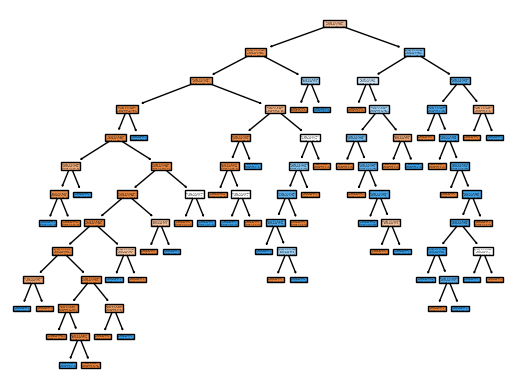

In [24]:
tree.plot_tree(dtc, filled = True)

Accuracy

In [25]:
tree_acc=dtc.score(test_inputs, test_classes)
tree_acc

0.7839506172839507

Confusion matrix

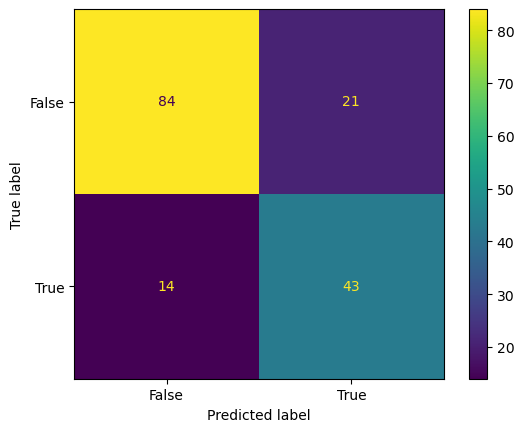

In [26]:
pred = dtc.predict(test_inputs)
cm = confusion_matrix(test_classes, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

For normalized data

In [27]:
dtc.fit(train_inputs_norm, train_classes_norm)

DecisionTreeClassifier()

[Text(0.5233609068627451, 0.9615384615384616, 'x[23] <= 0.475\ngini = 0.437\nsamples = 378\nvalue = [256, 122]'),
 Text(0.18152573529411764, 0.8846153846153846, 'x[22] <= 0.523\ngini = 0.234\nsamples = 281\nvalue = [243, 38]'),
 Text(0.16191789215686275, 0.8076923076923077, 'x[11] <= 0.0\ngini = 0.201\nsamples = 274\nvalue = [243, 31]'),
 Text(0.0392156862745098, 0.7307692307692307, 'x[23] <= 0.175\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.0196078431372549, 0.6538461538461539, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.058823529411764705, 0.6538461538461539, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2846200980392157, 0.7307692307692307, 'x[7] <= 0.375\ngini = 0.165\nsamples = 265\nvalue = [241, 24]'),
 Text(0.09803921568627451, 0.6538461538461539, 'x[23] <= 0.425\ngini = 0.365\nsamples = 50\nvalue = [38, 12]'),
 Text(0.058823529411764705, 0.5769230769230769, 'x[10] <= 0.0\ngini = 0.298\nsamples = 44\nvalue = [36, 8]'),
 Text(0.0392156862745098, 0.5, 'gini

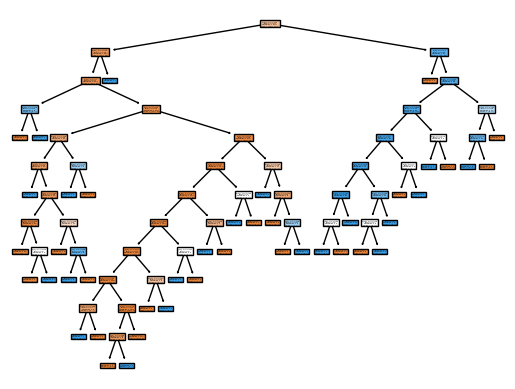

In [28]:
tree.plot_tree(dtc, filled = True)

In [29]:
tree_acc_norm=dtc.score(test_inputs_norm, test_classes_norm)
tree_acc_norm

0.7469135802469136

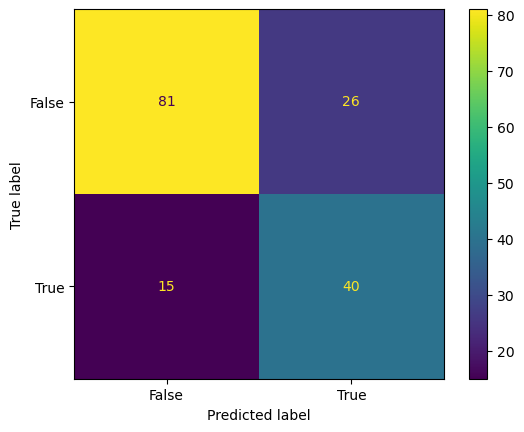

In [30]:
pred = dtc.predict(test_inputs_norm)
cm = confusion_matrix(test_classes_norm, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

Prune leaves

In [31]:
dtc = DecisionTreeClassifier(max_depth = 4)

In [32]:
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier(max_depth=4)

[Text(0.4791666666666667, 0.9, 'x[23] <= 0.425\ngini = 0.433\nsamples = 378\nvalue = [258, 120]'),
 Text(0.2708333333333333, 0.7, 'x[22] <= 0.432\ngini = 0.204\nsamples = 260\nvalue = [230, 30]'),
 Text(0.16666666666666666, 0.5, 'x[15] <= 0.107\ngini = 0.173\nsamples = 251\nvalue = [227, 24]'),
 Text(0.08333333333333333, 0.3, 'x[3] <= 0.98\ngini = 0.103\nsamples = 202\nvalue = [191, 11]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.095\nsamples = 201\nvalue = [191, 10]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3, 'x[3] <= 0.461\ngini = 0.39\nsamples = 49\nvalue = [36, 13]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.375, 0.5, 'x[1] <= 0.266\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 

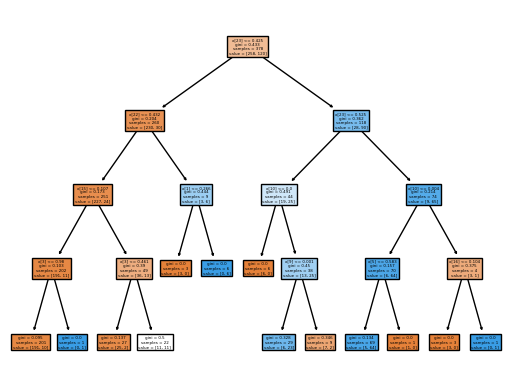

In [33]:
tree.plot_tree(dtc, filled = True)

In [34]:
tree_prune_acc=dtc.score(test_inputs, test_classes)
tree_prune_acc

0.8333333333333334

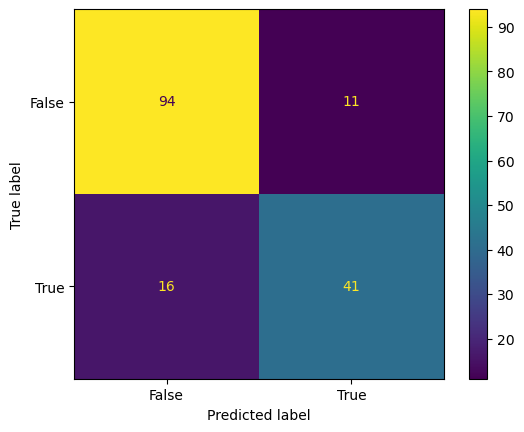

In [35]:
pred = dtc.predict(test_inputs)
cm = confusion_matrix(test_classes, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

For normalized data

In [36]:
dtc = DecisionTreeClassifier(max_depth = 4)

In [37]:
dtc.fit(train_inputs_norm, train_classes_norm)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[23] <= 0.475\ngini = 0.437\nsamples = 378\nvalue = [256, 122]'),
 Text(0.3125, 0.7, 'x[22] <= 0.523\ngini = 0.234\nsamples = 281\nvalue = [243, 38]'),
 Text(0.25, 0.5, 'x[11] <= 0.0\ngini = 0.201\nsamples = 274\nvalue = [243, 31]'),
 Text(0.125, 0.3, 'x[23] <= 0.175\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.3, 'x[7] <= 0.375\ngini = 0.165\nsamples = 265\nvalue = [241, 24]'),
 Text(0.3125, 0.1, 'gini = 0.365\nsamples = 50\nvalue = [38, 12]'),
 Text(0.4375, 0.1, 'gini = 0.105\nsamples = 215\nvalue = [203, 12]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6875, 0.7, 'x[6] <= 0.19\ngini = 0.232\nsamples = 97\nvalue = [13, 84]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[25] <= 0.812\ngini = 0.205\nsamples = 95\nvalue = [11, 84]'),
 Text(0.625, 0.3, 'x[6] <= 0.81\

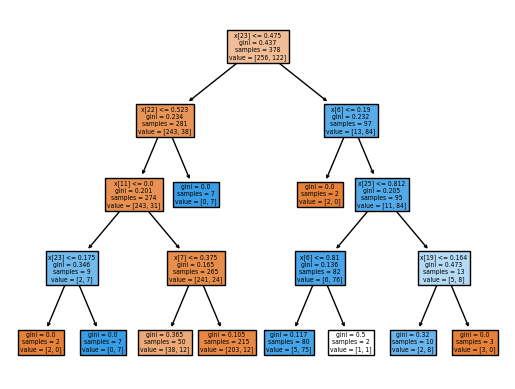

In [38]:
tree.plot_tree(dtc, filled = True)

In [39]:
tree_prune_acc_norm=dtc.score(test_inputs_norm, test_classes_norm)
tree_prune_acc_norm

0.8024691358024691

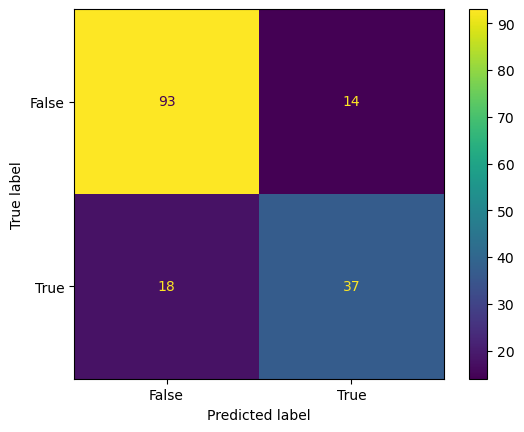

In [40]:
pred = dtc.predict(test_inputs_norm)
cm = confusion_matrix(test_classes_norm, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# Naive Bayes

Naive Byaes doesn't work when I have both categorical and continuous data. I'll split data frame into two separate data frames based on type of values in them.

In [41]:
pcos_continuous = pcos.drop(pcos.columns[[8,10,23,24,25,26,27,28]],axis = 1)
pcos_categorical = pcos.iloc[: , [0,8,10,23,24,25,26,27,28]].copy() 

(train_set_con, test_set_con) = train_test_split(pcos_continuous.values, train_size=0.7)
(train_set_cat, test_set_cat) = train_test_split(pcos_categorical.values, train_size=0.7)
train_set_con.shape

(378, 28)

In [42]:
#for categorical
train_inputs_cat = train_set_cat[:, 1:9]
test_inputs_cat = test_set_cat[:, 1:9]
train_classes_cat = np.asarray(train_set_cat[:, 0], dtype='|S6')
test_classes_cat = np.asarray(test_set_cat[:, 0], dtype='|S6')

#for continuous
train_inputs_con = train_set_con[:, 1:28]
test_inputs_con = test_set_con[:, 1:28]
train_classes_con = train_set_con[:, 0]
test_classes_con = test_set_con[:, 0]




Initiation

For continuous data I'll use Gaussian method

In [43]:
NB_con = GaussianNB()
NB_con.fit(train_inputs_con, train_classes_con)

print(NB_con.score(test_inputs_con, test_classes_con))
proba_con = NB_con.predict_proba(test_inputs_con)

0.7654320987654321


For categorical data I'll use categorical method

In [44]:
NB_cat = CategoricalNB(alpha=1)
NB_cat.fit(train_inputs_cat, train_classes_cat)

#print(NB_con.fit())
print(NB_cat.score(test_inputs_cat, test_classes_cat))
proba_cat = NB_cat.predict_proba(test_inputs_cat)

0.8395061728395061


For every method I used proba fuction. It's a method that returns the class probabilities for each data point. Then I'll do naive bayes for newly created data frame

In [45]:
newdata = np.hstack((proba_cat, proba_con))

(train_set_new, test_set_new) = train_test_split(newdata, train_size=0.5)

train_inputs_new = train_set_new
test_inputs_new = test_set_new
train_classes_new = train_classes_cat[:81]
test_classes_new = test_classes_cat[:81]



In [46]:
NB_all = GaussianNB()
NB_all.fit(train_inputs_new, test_classes_new)

NB_acc = (NB_all.score(test_inputs_new, test_classes_new))
NB_acc

0.5679012345679012

For normalized data

In [47]:
pcos_continuous = pcos_norm.drop(pcos_norm.columns[[8,10,23,24,25,26,27,28]],axis = 1)
pcos_categorical = pcos_norm.iloc[: , [0,8,10,23,24,25,26,27,28]].copy() 

(train_set_con, test_set_con) = train_test_split(pcos_continuous.values, train_size=0.7)
(train_set_cat, test_set_cat) = train_test_split(pcos_categorical.values, train_size=0.7)
train_set_con.shape

(378, 28)

In [48]:
# #for categorical
# train_inputs_cat = train_set_cat[:, 1:9]
# test_inputs_cat = test_set_cat[:, 1:9]
# train_classes_cat = np.asarray(train_set_cat[:, ], dtype='|S6')
# test_classes_cat = np.asarray(test_set_cat[:, ], dtype='|S6')

#for continuous
train_inputs_con = train_set_con[:, 1:28]
test_inputs_con = test_set_con[:, 1:28]
train_classes_con = train_set_con[:, 0]
test_classes_con = test_set_con[:, 0]

In [49]:
NB_con = GaussianNB()
NB_con.fit(train_inputs_con, train_classes_con)

print(NB_con.score(test_inputs_con, test_classes_con))
proba_con = NB_con.predict_proba(test_inputs_con)

0.7037037037037037


In [50]:
NB_cat = CategoricalNB(alpha=1)
NB_cat.fit(train_inputs_cat, train_classes_cat)

#print(NB_con.fit())
print(NB_cat.score(test_inputs_cat, test_classes_cat))
proba_cat = NB_cat.predict_proba(test_inputs_cat)

0.8395061728395061


In [51]:
newdata = np.hstack((proba_cat, proba_con))

(train_set_new, test_set_new) = train_test_split(newdata, train_size=0.5)

train_inputs_new = train_set_new
test_inputs_new = test_set_new
train_classes_new = train_classes_cat[:81]
test_classes_new = test_classes_cat[:81]



In [52]:
NB_all = GaussianNB()
NB_all.fit(train_inputs_new, test_classes_new)

NB_acc_norm = (NB_all.score(test_inputs_new, test_classes_new))
NB_acc_norm

0.6419753086419753

# k-Nearest Neighbours

For 3 nearest neighbours

In [53]:
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(train_inputs, train_classes)

pred3 = knn3.predict(test_inputs)
confusion_matrix(test_classes, pred3)

array([[102,   3],
       [ 16,  41]], dtype=int64)

In [54]:
knn3_acc = metrics.accuracy_score(test_classes, pred3)
knn3_acc

0.8827160493827161

For 5 nearest neighbours

In [55]:
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(train_inputs, train_classes)

pred5 = knn5.predict(test_inputs)
confusion_matrix(test_classes, pred5)


array([[101,   4],
       [ 19,  38]], dtype=int64)

In [56]:
knn5_acc = metrics.accuracy_score(test_classes, pred5)
knn5_acc

0.8580246913580247

For 11 nearest neighbours

In [57]:
knn11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn11.fit(train_inputs, train_classes)

pred11 = knn3.predict(test_inputs)
confusion_matrix(test_classes, pred11)


array([[102,   3],
       [ 16,  41]], dtype=int64)

In [58]:
knn11_acc = metrics.accuracy_score(test_classes, pred11)
knn11_acc

0.8827160493827161

Normalized

In [59]:
(train_set_norm, test_set_norm) = train_test_split(pcos_norm.values, train_size=0.7)
train_inputs_norm = train_set_norm[:, 1:35]
train_classes_norm = train_set_norm[:, 0]
test_inputs_norm = test_set_norm[:, 1:35]
test_classes_norm = test_set_norm[:, 0]

In [60]:
knn3_norm = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3_norm.fit(train_inputs_norm, train_classes_norm)

pred3_norm = knn3_norm.predict(test_inputs_norm)
confusion_matrix(test_classes_norm, pred3_norm)

array([[96, 13],
       [18, 35]], dtype=int64)

In [61]:
knn3_acc_norm = metrics.accuracy_score(test_classes_norm, pred3)
knn3_acc_norm

0.6234567901234568

In [62]:
knn5_norm = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5_norm.fit(train_inputs_norm, train_classes_norm)

pred5_norm = knn5_norm.predict(test_inputs_norm)
confusion_matrix(test_classes_norm, pred5_norm)

array([[100,   9],
       [ 18,  35]], dtype=int64)

In [63]:
knn5_acc_norm = metrics.accuracy_score(test_classes_norm, pred5)
knn5_acc_norm

0.6234567901234568

In [64]:
knn11_norm = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn11_norm.fit(train_inputs_norm, train_classes_norm)

pred11_norm = knn11_norm.predict(test_inputs_norm)
confusion_matrix(test_classes_norm, pred11_norm)

array([[103,   6],
       [ 16,  37]], dtype=int64)

In [65]:
knn11_acc_norm = metrics.accuracy_score(test_classes_norm, pred11)
knn11_acc_norm

0.6234567901234568

# Neural Network

Two hidden values, one hidden layer

Creating an classifier from the model

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=(2, ), max_iter=3000) 

#fitting data
mlp.fit(train_inputs, train_classes)

MLPClassifier(hidden_layer_sizes=(2,), max_iter=3000)

In [67]:
predictions_test = mlp.predict(test_inputs)
neural1_acc = accuracy_score(predictions_test, test_classes)
print(accuracy_score(predictions_test, test_classes))
print(confusion_matrix(test_classes,predictions_test))

0.845679012345679
[[95 10]
 [15 42]]


Four hidden values, two hidden layers

In [68]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2, ), max_iter=3000) 

mlp.fit(train_inputs, train_classes)
predictions_test = mlp.predict(test_inputs)
neural2_acc = accuracy_score(predictions_test, test_classes)
print(accuracy_score(predictions_test, test_classes))
print(confusion_matrix(test_classes,predictions_test))

0.845679012345679
[[94 11]
 [14 43]]


Five hidden values, two hidden layers

In [69]:
mlp = MLPClassifier(hidden_layer_sizes=(3,2, ), max_iter=3000) 
mlp.fit(train_inputs, train_classes)
predictions_test = mlp.predict(test_inputs)
neural3_acc = accuracy_score(predictions_test, test_classes)
print(accuracy_score(predictions_test, test_classes))
print(confusion_matrix(test_classes,predictions_test))

0.8641975308641975
[[99  6]
 [16 41]]


Six hidden values, three hidden layers

In [70]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2, 2, ), max_iter=3000) 
mlp.fit(train_inputs, train_classes)
predictions_test = mlp.predict(test_inputs)
neural4_acc = accuracy_score(predictions_test, test_classes)
print(accuracy_score(predictions_test, test_classes))
print(confusion_matrix(test_classes,predictions_test))

0.6481481481481481
[[105   0]
 [ 57   0]]


For normalized data

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(2, ), max_iter=3000) 
mlp.fit(train_inputs_norm, train_classes_norm)
predictions_test = mlp.predict(test_inputs_norm)
neural1_acc_norm = accuracy_score(predictions_test, test_classes_norm)
print(accuracy_score(predictions_test, test_classes_norm))
print(confusion_matrix(test_classes_norm,predictions_test))

0.9135802469135802
[[105   4]
 [ 10  43]]


In [72]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2, ), max_iter=3000) 

mlp.fit(train_inputs_norm, train_classes_norm)
predictions_test = mlp.predict(test_inputs_norm)
neural2_acc_norm = accuracy_score(predictions_test, test_classes_norm)
print(accuracy_score(predictions_test, test_classes_norm))
print(confusion_matrix(test_classes_norm,predictions_test))

0.6728395061728395
[[109   0]
 [ 53   0]]


In [73]:
mlp = MLPClassifier(hidden_layer_sizes=(3,2, ), max_iter=3000) 
mlp.fit(train_inputs_norm, train_classes_norm)
predictions_test = mlp.predict(test_inputs_norm)
neural3_acc_norm = accuracy_score(predictions_test, test_classes_norm)
print(accuracy_score(predictions_test, test_classes_norm))
print(confusion_matrix(test_classes_norm,predictions_test))

0.8888888888888888
[[102   7]
 [ 11  42]]


In [74]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2, 2, ), max_iter=3000) 
mlp.fit(train_inputs_norm, train_classes_norm)
predictions_test = mlp.predict(test_inputs_norm)
neural4_acc_norm = accuracy_score(predictions_test, test_classes_norm)
print(accuracy_score(predictions_test, test_classes_norm))
print(confusion_matrix(test_classes_norm,predictions_test))

0.6728395061728395
[[109   0]
 [ 53   0]]


# Keras

In keras I will be using different splitting. I don't have to split the data into train and test as keras function has it in itself.

In [75]:
inputs = pcos.iloc[:,1:35]
classes = pcos.iloc[:,0]

Input dim takes number of columns that are used for prediction.

The first hidden layer has 6 nodes and uses the relu activation function.

The second hidden layer has 3 nodes and uses the relu activation function.

The output layer has one node and uses the sigmoid activation function. 

In [76]:
#classes = np_utils.to_categorical(classes)
model1 = Sequential()
model1.add(Dense(6, input_dim = 34, activation='relu'))
model1.add(Dense(3, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

I use cross entropy as the loss argument. This loss is for a binary classification problems. 

Optimizer 'adam' is effictient stochastic gradient descent.

The code will collect and report the classification accuracy defined by the metrics argument.

In [77]:
model1.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [78]:
model1.fit(inputs, classes, epochs=150, batch_size=10)

Epoch 1/150
54/54 [==============================] - 1s 5ms/step - loss: 0.7058 - accuracy: 0.5537
Epoch 2/150
54/54 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.6574
Epoch 3/150
54/54 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.6722
Epoch 4/150
54/54 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.7352
Epoch 5/150
54/54 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.7722
Epoch 6/150
54/54 [==============================] - 0s 5ms/step - loss: 0.6071 - accuracy: 0.7963
Epoch 7/150
54/54 [==============================] - 0s 5ms/step - loss: 0.5891 - accuracy: 0.8204
Epoch 8/150
54/54 [==============================] - 0s 5ms/step - loss: 0.5730 - accuracy: 0.8222
Epoch 9/150
54/54 [==============================] - 0s 5ms/step - loss: 0.5578 - accuracy: 0.8352
Epoch 10/150
54/54 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.8333
Epoch 11/

In [79]:
predict1 = model1.predict(inputs)
predict1 = np.argmax(predict1, axis=1)
keras1_acc = accuracy_score(classes, predict1)
keras1_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

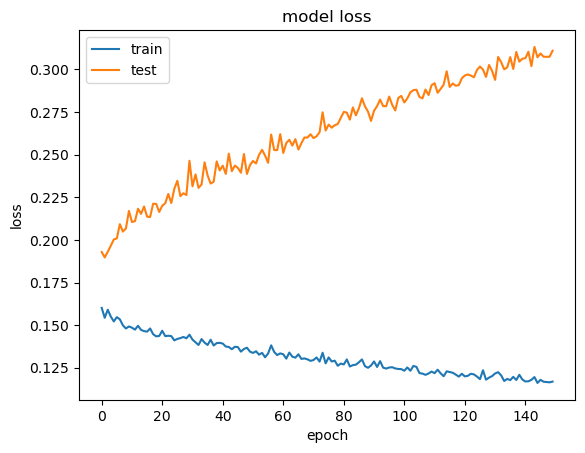

In [80]:
history = model1.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As seen in plot, model is overfitted.

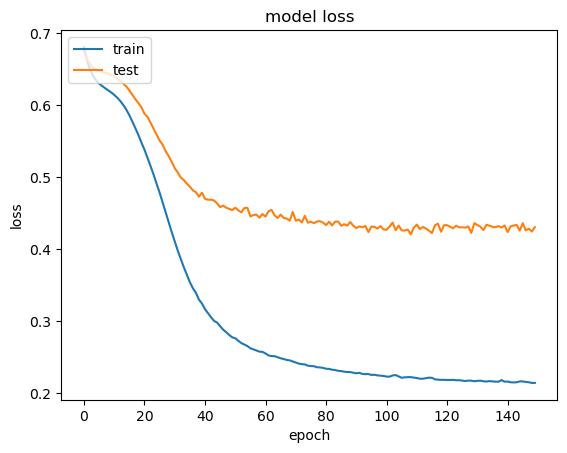

In [81]:

model2 = Sequential()
model2.add(Dense(12, input_dim = 34,activation='sigmoid'))
model2.add(Dense(6, activation = 'sigmoid'))
model2.add(Dense(3, activation = 'sigmoid'))
model2.add(Dense(1, activation='sigmoid')) 
model2.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
history = model2.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
predict2 = model2.predict(inputs)
predict2 = np.argmax(predict2, axis=1)
keras2_acc = accuracy_score(classes, predict2)
keras2_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

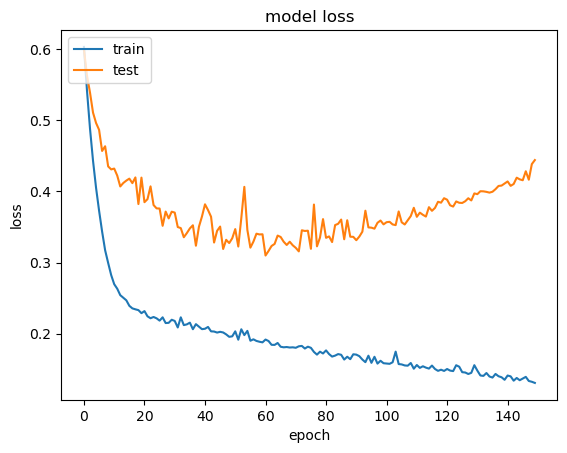

In [83]:

model3 = Sequential()
model3.add(Dense(12, input_dim = 34,activation='tanh'))
model3.add(Dense(6, activation = 'tanh'))
model3.add(Dense(3, activation = 'tanh'))
model3.add(Dense(1, activation='sigmoid')) 
model3.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
history = model3.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
predict3 = model3.predict(inputs)
predict3 = np.argmax(predict3, axis=1)
keras3_acc = accuracy_score(classes, predict3)
keras3_acc

17/17 [==============================] - 0s 4ms/step


0.6722222222222223

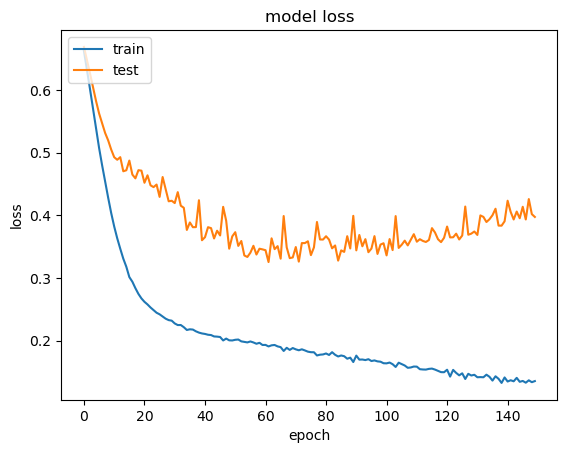

In [86]:

model4 = Sequential()
model4.add(Dense(12, input_dim = 34,activation='relu'))
model4.add(Dense(6, activation = 'relu'))
model4.add(Dense(3, activation = 'relu'))
model4.add(Dense(1, activation='sigmoid')) 
model4.compile(loss='binary_crossentropy', optimizer = 'RMSprop',metrics = ['accuracy'])
history = model4.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
predict4 = model4.predict(inputs)
predict4 = np.argmax(predict4, axis=1)
keras4_acc = accuracy_score(classes, predict4)
keras4_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

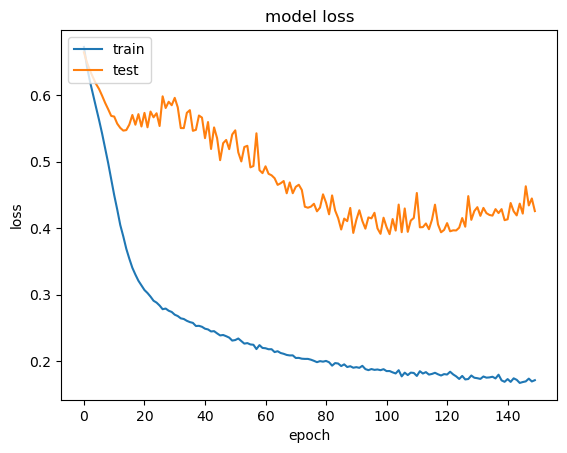

In [88]:

model5 = Sequential()
model5.add(Dense(12, input_dim = 34,activation='relu'))
model5.add(Dense(6, activation = 'relu'))
model5.add(Dense(3, activation = 'relu'))
model5.add(Dense(1, activation='sigmoid')) 
model5.compile(loss='binary_crossentropy', optimizer = 'SGD',metrics = ['accuracy'])
history = model5.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
predict5 = model5.predict(inputs)
predict5 = np.argmax(predict5, axis=1)
keras5_acc = accuracy_score(classes, predict5)
keras5_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

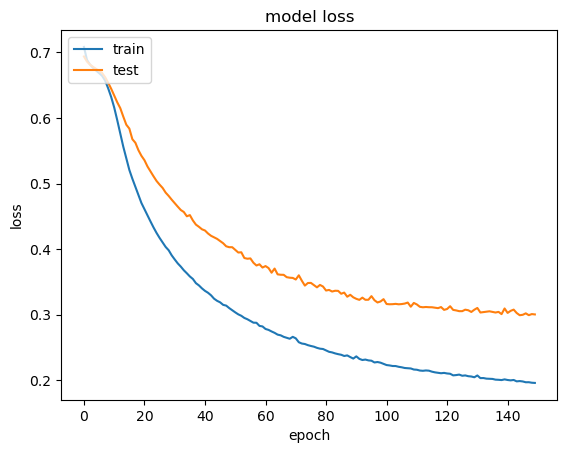

In [90]:

model6 = Sequential()
model6.add(Dense(3, input_dim = 34,activation='relu'))
model6.add(Dense(2, activation='relu')) 

model6.add(Dense(1, activation='sigmoid')) 
model6.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
history = model6.fit(inputs, classes, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
predict6 = model6.predict(inputs)
predict6 = np.argmax(predict6, axis=1)
keras6_acc = accuracy_score(classes, predict6)
keras6_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

For normalized data

In [92]:
inputs_norm = pcos_norm.iloc[:,1:35]
classes_norm = pcos_norm.iloc[:,0]

In [93]:
model1_norm = Sequential()
model1_norm.add(Dense(6, input_dim = 34, activation='relu'))
model1_norm.add(Dense(3, activation = 'relu'))
model1_norm.add(Dense(1, activation = 'sigmoid'))

model1_norm.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
model1_norm.fit(inputs_norm, classes_norm, epochs=150, batch_size=10)

Epoch 1/150
54/54 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.6685
Epoch 2/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6722
Epoch 3/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.6722
Epoch 4/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.6722
Epoch 5/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.6741
Epoch 6/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.6759
Epoch 7/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.6778
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8241
Epoch 9/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8722
Epoch 10/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8685
Epoch 11/

In [94]:
predict1_norm = model1_norm.predict(inputs_norm)
predict1_norm = np.argmax(predict1_norm, axis=1)
keras1_norm_acc = accuracy_score(classes_norm, predict1_norm)
keras1_norm_acc

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

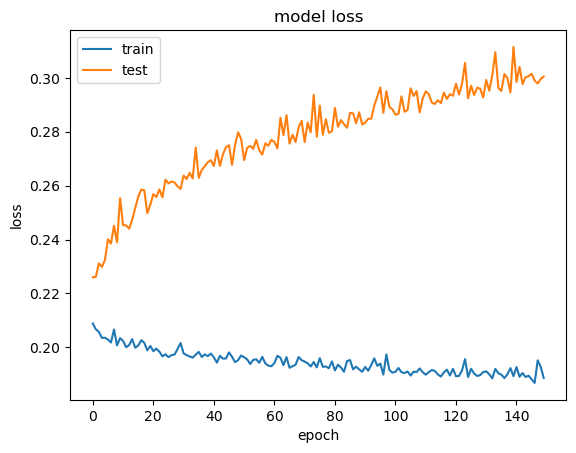

In [95]:
history = model1_norm.fit(inputs_norm, classes_norm, validation_split=0.3, epochs=150, batch_size=10, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

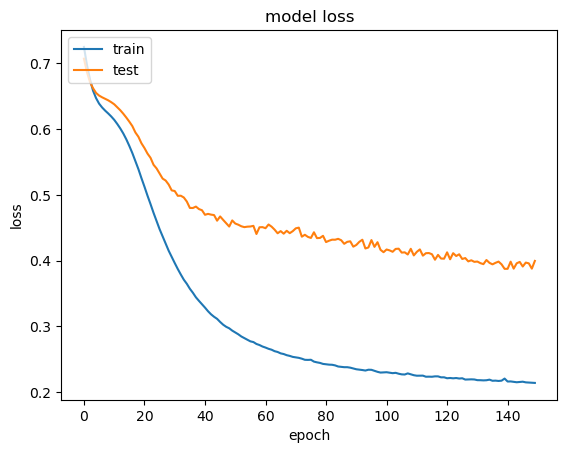

In [96]:

model2_norm = Sequential()
model2_norm.add(Dense(12, input_dim = 34,activation='sigmoid'))
model2_norm.add(Dense(6, activation = 'sigmoid'))
model2_norm.add(Dense(3, activation = 'sigmoid'))
model2_norm.add(Dense(1, activation='sigmoid')) 
model2_norm.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
history = model2_norm.fit(inputs_norm, classes_norm, validation_split=0.3, epochs=150, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
predict2_norm = model2_norm.predict(inputs_norm)
predict2_norm = np.argmax(predict2_norm, axis=1)
keras2_acc_norm = accuracy_score(classes_norm, predict2_norm)
keras2_acc_norm

17/17 [==============================] - 0s 2ms/step


0.6722222222222223

I won't be doing the rest because as seen above, accuracies are the same everywhere (I am not sure why) and the plots are the same for original data and normalized data minus the noise.

# Conclusion

In [98]:
data = {'Original data': [tree_acc, tree_prune_acc, NB_acc, knn3_acc, knn5_acc, knn11_acc, neural1_acc, neural2_acc, neural3_acc, neural4_acc, keras1_acc, keras2_acc, keras3_acc, keras4_acc, keras5_acc, keras6_acc],
        'Normalized data': [tree_acc_norm,tree_prune_acc_norm, NB_acc_norm, knn3_acc_norm, knn5_acc_norm, knn11_acc_norm, neural1_acc_norm, neural2_acc_norm, neural3_acc_norm, neural4_acc_norm, keras1_norm_acc, keras2_acc_norm, 0,0,0,0]}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data)
# , index=['Decision tree',
#                                'Naive Bayes',
#                                '3 nearest neighbours',
#                                '5 nearest neighbours',
#                               '11 nearest neighbours',
#                               'Neural network - one hidden layer, two hidden values',
#                               'Neural network - two hidden layers, four hidden values', 
#                               'Neural network - two hidden layers, five hidden values', 
#                               'Neural network - three hidden layers, six hidden values', 
#                               'Keras - relu, relu, sigmoid, adam', 
#                               'Keras - sigmoid, sigmoid, sigmoid, sigmoid, adam', 
#                               'Keras - tanh, tanh, tanh, sigmoid, adam', 
#                               'Keras - relu, relu, relu, sigmoid, RMSprop', 
#                               'Keras - relu, relu, relu, sigmoid, SGD', 
#                               'Keras - relu, relu, sigmoid, adam'])
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16]
what = ['Decision tree', 'Decision tree with prune leaves',
                               'Naive Bayes',
                               '3 nearest neighbours',
                               '5 nearest neighbours',
                              '11 nearest neighbours',
                              'Neural network - one hidden layer, two hidden values',
                              'Neural network - two hidden layers, four hidden values', 
                              'Neural network - two hidden layers, five hidden values', 
                              'Neural network - three hidden layers, six hidden values', 
                              'Keras - relu, relu, sigmoid, adam', 
                              'Keras - sigmoid, sigmoid, sigmoid, sigmoid, adam', 
                              'Keras - tanh, tanh, tanh, sigmoid, adam', 
                              'Keras - relu, relu, relu, sigmoid, RMSprop', 
                              'Keras - relu, relu, relu, sigmoid, SGD', 
                              'Keras - relu, relu, sigmoid, adam']
df.set_index([numbers, what], inplace=True)

In [99]:
def highlight_cells(val):
    color = 'lightgreen' if val > 0.85 else ''
    return 'background-color: {}'.format(color)

df.style.applymap(highlight_cells)



,,Original data,Normalized data
1,Decision tree,0.783951,0.746914
2,Decision tree with prune leaves,0.833333,0.802469
3,Naive Bayes,0.567901,0.641975
4,3 nearest neighbours,0.882716,0.623457
5,5 nearest neighbours,0.858025,0.623457
6,11 nearest neighbours,0.882716,0.623457
7,"Neural network - one hidden layer, two hidden values",0.845679,0.913580
8,"Neural network - two hidden layers, four hidden values",0.845679,0.672840
9,"Neural network - two hidden layers, five hidden values",0.864198,0.888889
10,"Neural network - three hidden layers, six hidden values",0.648148,0.672840
